In [9]:
from google.colab import files
import os

# Upload the .rar file
uploaded = files.upload()

In [10]:
# Create a directory to extract the files
os.makedirs('extracted', exist_ok=True)

# Extract the .rar file
!unrar x "Task 3.rar" extracted/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from Task 3.rar


Would you like to replace the existing file extracted/test/cat.9818.jpg
 31125 bytes, modified on 2013-09-20 08:12
with a new one
 31125 bytes, modified on 2013-09-20 08:12

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [15]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [16]:
# Function to load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if 'cat' in filename:
            label = 0
        elif 'dog' in filename:
            label = 1
        else:
            continue
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize image
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [17]:
# Load training images
train_folder = 'extracted/train'
X_train, y_train = load_images_from_folder(train_folder)

In [18]:
# Load testing images
test_folder = 'extracted/test'
X_test, y_test = load_images_from_folder(test_folder)

In [19]:
# Flatten the images
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [20]:
# Normalize the pixel values
X_train_flatten = X_train_flatten / 255.0
X_test_flatten = X_test_flatten / 255.0

In [21]:
# Initialize the SVM model
svm_model = SVC(kernel='linear')

In [22]:
# Train the model
svm_model.fit(X_train_flatten, y_train)

SVC(kernel='linear')

In [23]:
# Make predictions
y_pred = svm_model.predict(X_test_flatten)

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [27]:
# Function to plot sample images
def plot_sample_images(images, labels, class_names, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(images[i])
        axes[i].set_title(class_names[labels[i]])
        axes[i].axis('off')
    plt.show()

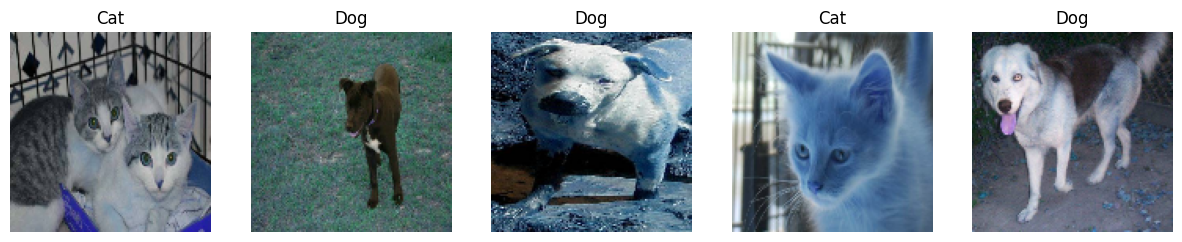

In [28]:
# Plot sample images
class_names = ['Cat', 'Dog']
plot_sample_images(X_train, y_train, class_names)

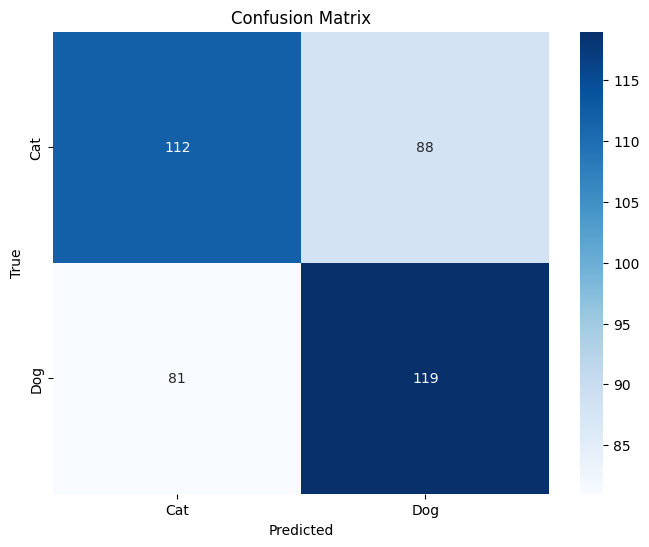

In [29]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-30-f9e23c0a79bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='Set2')


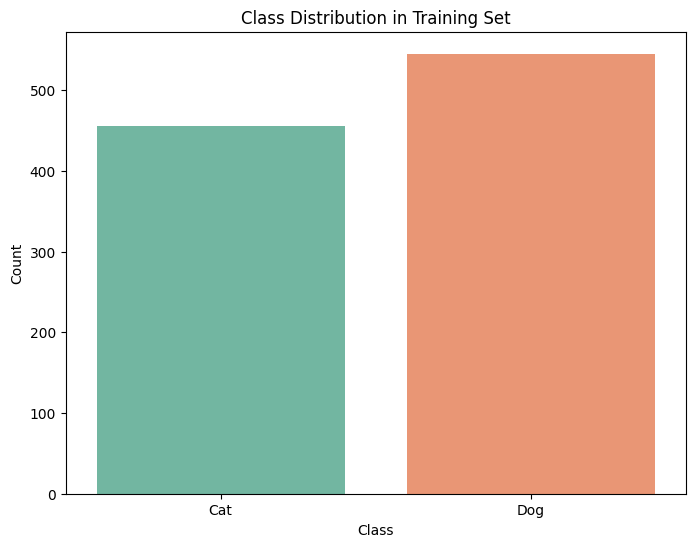

<ipython-input-30-f9e23c0a79bf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Set2')


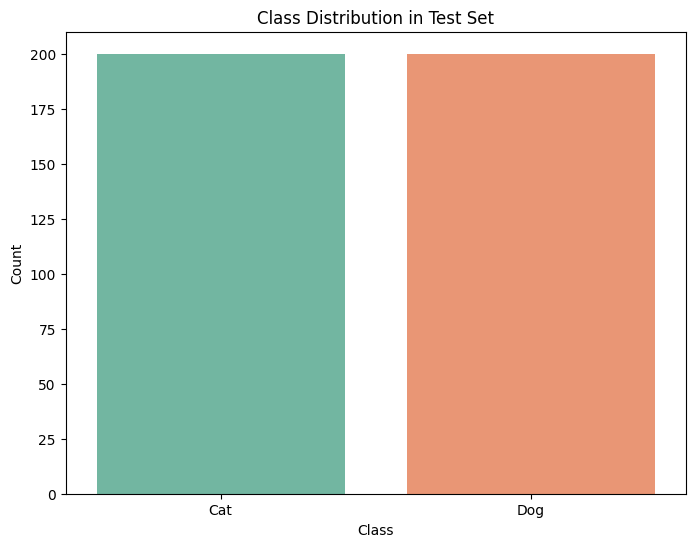

In [30]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='Set2')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=class_names)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, palette='Set2')
plt.title('Class Distribution in Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=class_names)
plt.show()

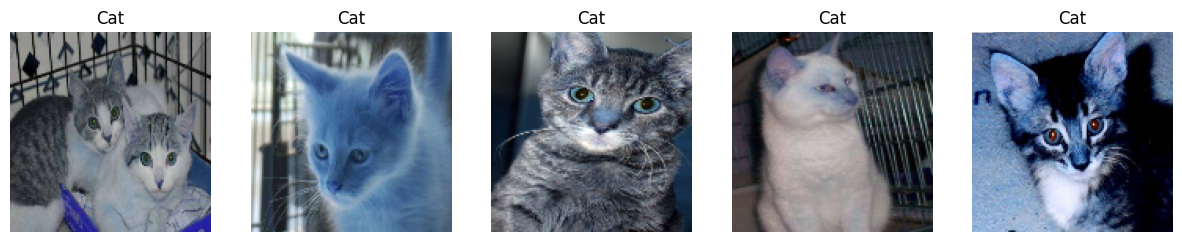

In [31]:
# Visualize support vectors
support_vector_indices = svm_model.support_
support_vectors = X_train[support_vector_indices]
plot_sample_images(support_vectors, y_train[support_vector_indices], class_names, num_samples=min(5, len(support_vectors)))

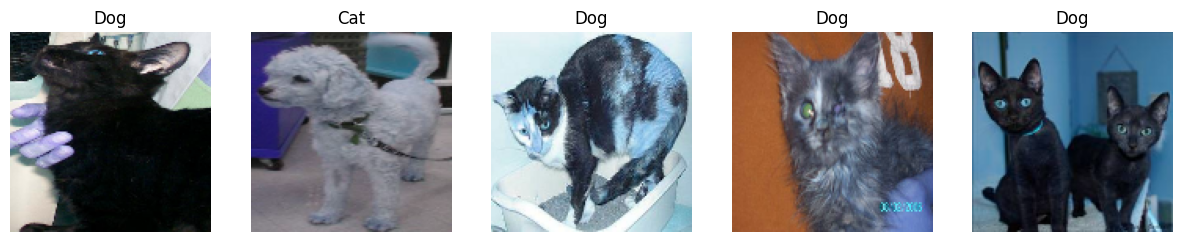

In [32]:
# Plot misclassified images
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_images = X_test[misclassified_indices]
misclassified_labels_true = y_test[misclassified_indices]
misclassified_labels_pred = y_pred[misclassified_indices]
plot_sample_images(misclassified_images, misclassified_labels_pred, class_names, num_samples=min(5, len(misclassified_images)))

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

Accuracy: 57.75%
Classification Report:
              precision    recall  f1-score   support

         Cat       0.58      0.56      0.57       200
         Dog       0.57      0.59      0.58       200

    accuracy                           0.58       400
   macro avg       0.58      0.58      0.58       400
weighted avg       0.58      0.58      0.58       400

